<a href="https://colab.research.google.com/github/umiSirya/MachineLearning_2/blob/main/Milk_tsa_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Getting  the dataset

In [ ]:
df = pd.read_csv('/content/monthly-milk-production-pounds.csv')
df

,Month,Monthly milk production (pounds per cow)
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Month                                     168 non-null    object
 1   Monthly milk production (pounds per cow)  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [ ]:
df.describe()

,Monthly milk production (pounds per cow)
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


## Data Cleaning

In [ ]:
# Converting the colun indx to datetime type
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
# Setting the month column as index
df.set_index('Month', inplace=True)

In [ ]:
df

,Monthly milk production (pounds per cow)
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [ ]:
# Renaming the Monthly milk production (pounds per cow) to milk_production
df.rename(columns={'Monthly milk production (pounds per cow)': 'milk_production'}, inplace=True)


## Visualization

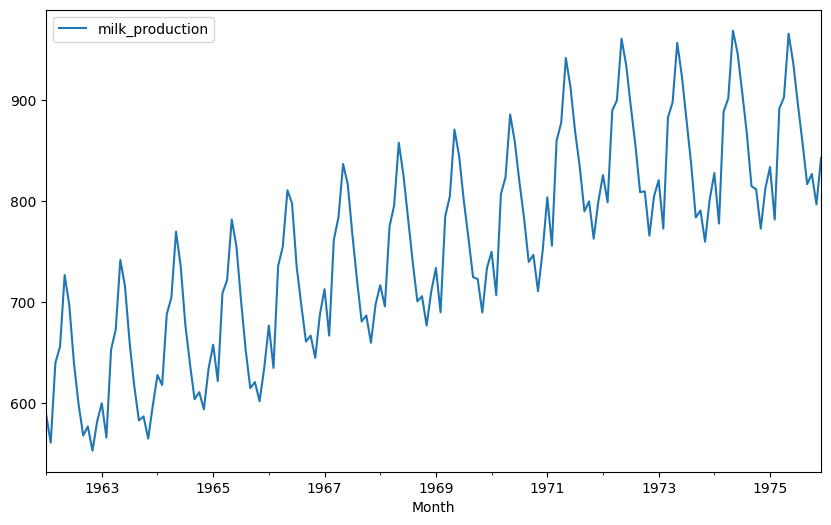

In [ ]:
df.plot(figsize=(10, 6))
plt.show()

## Checking for statioanrity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(df['milk_production'])
print("ADF statistics :%f" % result[0])
print("p-value: %f" % result[1])

ADF statistics :-1.303812
p-value: 0.627427


In [ ]:
result

(-1.3038115874221308,
 0.6274267086030311,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [ ]:
# Interpretation
adf_statistics = result[0]
p_value = result[1]

if p_value < 0.5:
    print("The time series is stationary (reject null Hypothesis)")

else:
    print("the time seris is not stationary (Fail to reject the null hypothsis)")

the time seris is not stationary (Fail to reject the null hypothsis)




## Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:

#decompose the time series
result = seasonal_decompose(df['milk_production'], model='additive', period=12)
result.plot()
plt.show()

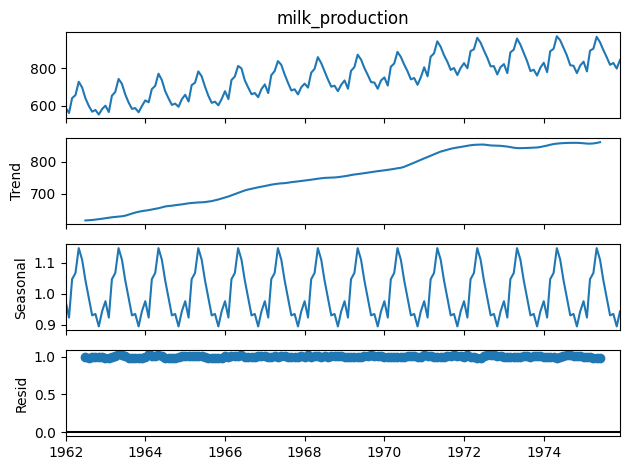

In [ ]:
#decompose the time series
result = seasonal_decompose(df['milk_production'], model='multiplicative', period=12)
result.plot()
plt.show()

## ACF and PACF Plot

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

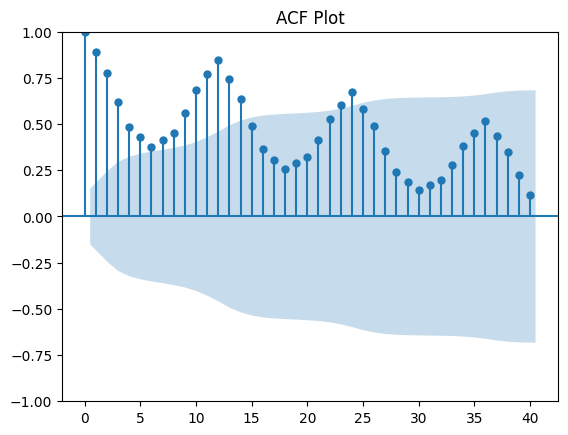

In [ ]:
# Creating an acfplot
plot_acf(df['milk_production'], lags=40)
plt.title("ACF Plot")
plt.show()

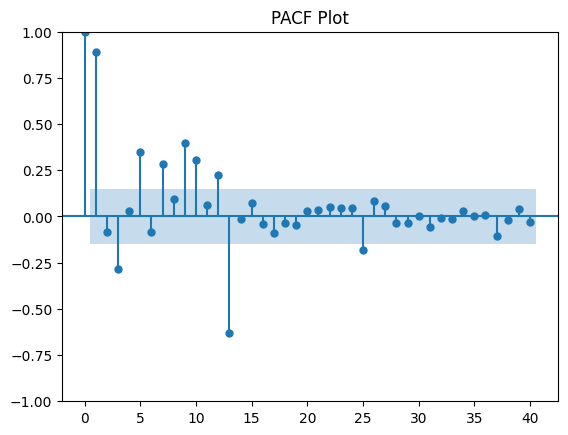

In [ ]:

# Creating an pacfplot
plot_pacf(df['milk_production'], lags=40)
plt.title("PACF Plot")
plt.show()





## Modelling

### Train-Test Split

In [ ]:
train = df[:'1974']
test = df['1975':]

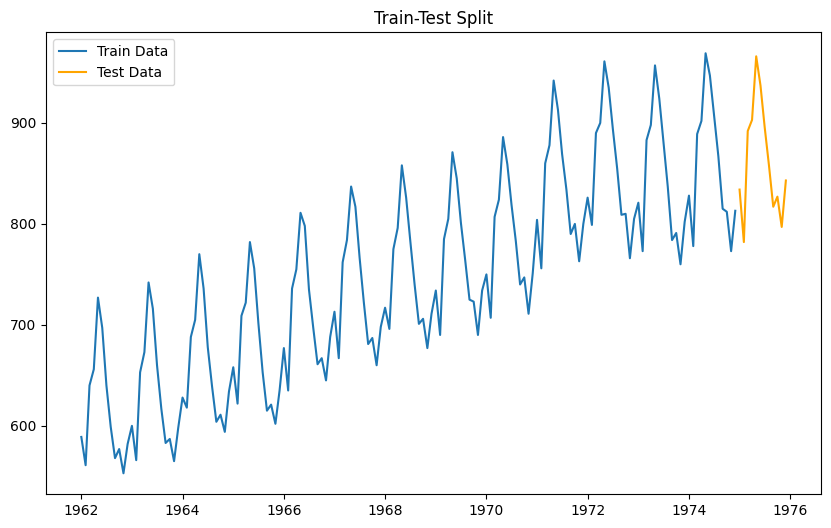

In [ ]:
# Plot the train-test split
plt.figure(figsize=(10, 6))
plt.plot(train, label="Train Data")
plt.plot(test, label="Test Data", color='orange')
plt.title("Train-Test Split")
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model_ar = ARIMA(train, order=(2, 0, 0))
ar = model_ar.fit()
print(ar.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        milk_production   No. Observations:                  156
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -811.726
Date:                Mon, 13 Jan 2025   AIC                           1631.452
Time:                        10:06:56   BIC                           1643.651
Sample:                    01-01-1962   HQIC                          1636.407
                         - 12-01-1974                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        742.8686     35.514     20.917      0.000     673.262     812.476
ar.L1          0.9850      0.115      8.602      0.000       0.761       1.209
ar.L2         -0.0946      0.124     -0.764      0.4

In [ ]:
model_ma = ARIMA(train, order=(0, 0,2))
ma = model_ma.fit()
print(ma.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:        milk_production   No. Observations:                  156
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -839.430
Date:                Mon, 13 Jan 2025   AIC                           1686.860
Time:                        10:06:58   BIC                           1699.059
Sample:                    01-01-1962   HQIC                          1691.814
                         - 12-01-1974                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        746.3752     12.121     61.579      0.000     722.619     770.131
ma.L1          0.9108      0.086     10.573      0.000       0.742       1.080
ma.L2          0.6547      0.067      9.793      0.0

In [ ]:
model_arma = ARIMA(train, order=(2, 0,2))
arma = model_arma.fit()
print(arma.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        milk_production   No. Observations:                  156
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -796.285
Date:                Mon, 13 Jan 2025   AIC                           1604.570
Time:                        10:06:59   BIC                           1622.869
Sample:                    01-01-1962   HQIC                          1612.002
                         - 12-01-1974                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        746.3827     27.086     27.556      0.000     693.296     799.470
ar.L1          0.6872      0.221      3.114      0.002       0.255       1.120
ar.L2          0.0925      0.211      0.438      0.6

In [ ]:
model_arima = ARIMA(train, order=(2, 2 ,2))
arima = model_arima.fit()
print(arima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        milk_production   No. Observations:                  156
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -785.460
Date:                Mon, 13 Jan 2025   AIC                           1580.919
Time:                        10:07:01   BIC                           1596.104
Sample:                    01-01-1962   HQIC                          1587.087
                         - 12-01-1974                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7325      0.003   -550.906      0.000      -1.739      -1.726
ar.L2         -0.9999      0.001  -1868.269      0.000      -1.001      -0.999
ma.L1          1.7238      0.127     13.555      0.0

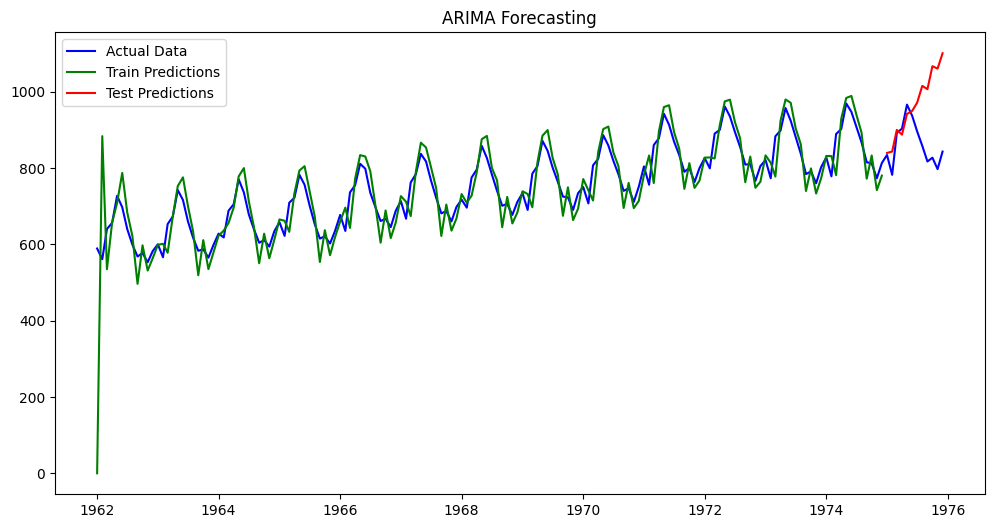

In [ ]:
arima_train_predictions = arima.fittedvalues
arima_test_predictions = arima.forecast(len(test))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df, label="Actual Data", color='blue')
plt.plot(train.index, arima_train_predictions, label="Train Predictions", color='green')
plt.plot(test.index, arima_test_predictions, label="Test Predictions", color='red')
plt.title("ARIMA Forecasting")
plt.legend()
plt.show()

In [ ]:
model_sarima = SARIMAX(train, order=(2, 2 ,2), seasonal_order=(2, 2, 2, 12))
sarima = model_sarima.fit()
print(sarima.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                    milk_production   No. Observations:                  156
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 12)   Log Likelihood                -477.563
Date:                            Mon, 13 Jan 2025   AIC                            973.126
Time:                                    10:07:16   BIC                            998.934
Sample:                                01-01-1962   HQIC                           983.613
                                     - 12-01-1974                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2170      0.091    -13.322      0.000      -1.396      -1.038
ar.L2         -0.3064      0.095   

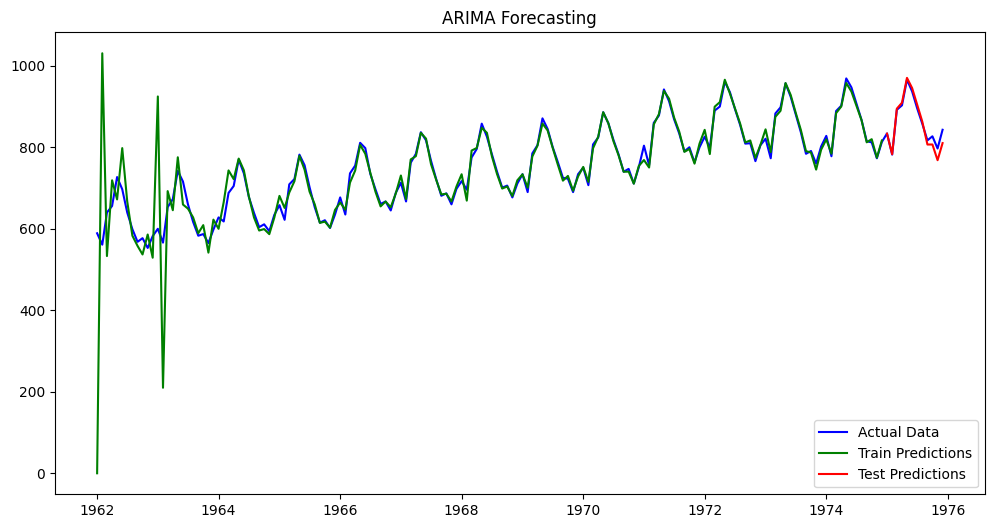

In [ ]:
sarima_train_predictions = sarima.fittedvalues
sarima_test_predictions = sarima.forecast(len(test))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df, label="Actual Data", color='blue')
plt.plot(train.index, sarima_train_predictions, label="Train Predictions", color='green')
plt.plot(test.index, sarima_test_predictions, label="Test Predictions", color='red')
plt.title("ARIMA Forecasting")
plt.legend()
plt.show()

## Evaluation

In [ ]:
# Evaluate ARIMA
arima_mae = mean_absolute_error(test, arima_test_predictions)
print(f"ARIMA MAE: {arima_mae:.2f}")

# Evaluate SARIMA
sarima_mae = mean_absolute_error(test, sarima_test_predictions)
print(f"SARIMA MAE: {sarima_mae:.2f}")


ARIMA MAE: 109.07
SARIMA MAE: 10.75
